## Questions for this Week

### 1. Use this article to answer the following questions:
#### https://realpython.com/numpy-scipy-pandas-correlation-python/
#### a. In a jupyter notebook markdown cell, describe the difference between linear and rank correlation.
#### b. Create a scatter plot showing the relationship between calculated_host_listings_count and availability_365 in the Belize Airbnb data
#### c. Calculate the correlation coefficient for the data in the scatter plot, and describe what is happening.
### 2. Create a box and whisker plot for the Belize Airbnb data price. In a markdown cell, describe what is going on in as simple of terms as possible. Use the documentation https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

# Linear vs. Rank Correlation

## Linear Correlations & Pearson Correlation Coefficient
#### Linear correlation is a measurement of how closely a set of variables of features of a particular dataset are related to a linear function.

#### The Pearson (or product-moment) correlation coefficient is a numerical representation of the linear correlation between features of a given dataset and is denoted as the letter r. Values of r range from -1 (perfect negative linear correlation) to 1 (perfect positive linear correlation) with 0 indicating no linear correlation between values.

### Implementation in Python
#### linear_regression = scipy.stats.linregress(x,y) is used to calculate a linear regression with a given set of x and y values or observations. 

#### Basic statistics can be calculated in Python in the following manner:
##### r: linear_regression.rvalue

#### The same basic command holds true for p values, standard error, slope, and intercept 

#### A summary of the statistics can also be calculated using the following:
#### scipy.stats.linregress(xy)

#### Using scipy and numpy:
#### r_value, p_value = scipy.stats.pearsonr(x, y)
#### np.corrcoef(x, y)


## Rank correlation
#### Rather than comparing values to a linear function, a rank correlation insteads considers just the order/rank of the variables or features.

#### The Spearman correlation coefficient is used for rank correlations and is typically denoted by the greek letter rho and is called Spearman's correlation coefficient or Spearman's rho. Here, the ranks for x and y pairs are used rather than their actual values.Rho also varies between -1 to 1 where 1 indicates that whenever x is increasing so is y (and vice versa) and -1 indicates that when x is increasing y is decreasing (and vice versa).

#### Can be considered in Python using:
#### scipy.stats.rankdata()

#### scipy.stats.spearman(x, y)

#### scipy.stats.kendalltau(x, y)

#### Example in pandas:
#### xy.corr(method='spearman')

##### Distribution free data set: maybe used for small datasets because there may not be enough data to determine a correlation; frequently used in teaching statistics to biology students--may not know actual distribution so it can still give some idea. 

##### Resources from Alexis: https://towardsdatascience.com/clearly-explained-pearson-v-s-spearman-correlation-coefficient-ada2f473b8 
##### https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient


### 1B: scatter plot for calculated_host_listings_count and availability_365


In [3]:
import numpy as np
import pandas as pd
import math
import statistics
from scipy import stats

#reading the csv file and displaying first 10 results as a reference for myself
belize_df = pd.read_csv('belize_airbnb_listings.csv')
belize_df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.74786,-88.02398,Entire home/apt,141,3,250,2/23/2021,2.00,5,225
1,36690,Mo's Cozy Cabana w/ comfy veranda & access to ...,157752,Monique,Belize,Belize Islands,17.74832,-88.02474,Entire home/apt,71,3,316,2/19/2021,2.46,5,164
2,108932,Purple House eco solar w/ ocean & wildlife views,563377,Michael,Belize,Belize Islands,17.73221,-88.03824,Entire home/apt,191,2,30,3/14/2020,0.78,1,364
3,110483,Michelo's fuchsia suite,567809,Michel,Stann Creek,Stann Creek Mainland,16.52114,-88.36926,Hotel room,121,1,27,2/24/2020,0.29,3,331
4,120115,Seaside Villas Second Floor Unit #4,604999,Bobbi,Belize,Belize Islands,17.74166,-88.02395,Entire home/apt,343,1,30,3/18/2020,0.64,22,203
5,120116,Valarosa,604999,Bobbi,Belize,Belize Islands,17.73644,-88.02858,Entire home/apt,171,2,49,3/23/2020,0.80,22,0
6,124794,Sabal Beach - secluded eco-retreat,562206,David & Wayne,Toledo,Toledo Mainland,16.28752,-88.54550,Entire home/apt,232,3,18,1/12/2020,0.16,2,338
7,152512,"Stunning one br apt-kitchen, air con, bikes & ...",733857,Jacki,Stann Creek,Stann Creek Mainland,16.52644,-88.37000,Entire home/apt,165,7,64,2/10/2021,0.57,5,298
8,152922,rent a private room in a house,735525,Jennifer,Cayo,Cayo,17.25395,-88.76870,Private room,52,1,11,12/14/2019,0.18,1,364
9,171294,King Deluxe,817242,Michael,Cayo,Cayo,17.16261,-89.06995,Private room,286,1,40,2/3/2020,0.47,8,362


In [4]:
listings=belize_df['calculated_host_listings_count'];

In [5]:
availability = belize_df['availability_365']


<AxesSubplot:xlabel='calculated_host_listings_count', ylabel='availability_365'>

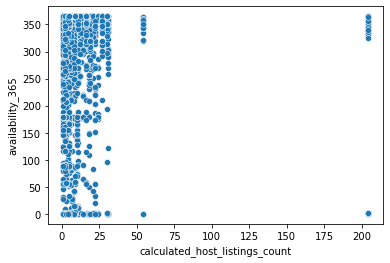

In [8]:
import matplotlib.pyplot as plt
#plt.scatter(listings, availability, edgecolors='k')
#plt.title('Listings vs. Availability of Belize Airbnb Data')
#plt.xlabel('Host Listings')
#plt.ylabel('Availability')
#plt.show()

import seaborn as sns
sns.scatterplot(x= 'calculated_host_listings_count', y= 'availability_365', data = belize_df)

### 1C: correlation coefficient for data in scatter plot

In [18]:
r = np.corrcoef(listings, availability)
print(r)

[[1.         0.17275503]
 [0.17275503 1.        ]]


#### There is essentially no correlation between listings and availability.

## 2:  Create a box and whisker plot for the Belize Airbnb data price. In a markdown cell, describe what is going on in as simple of terms as possible. Use the documentation https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

Text(0.5, 1.0, 'Belize Air Bnb Price Boxplot (Price distribution)')

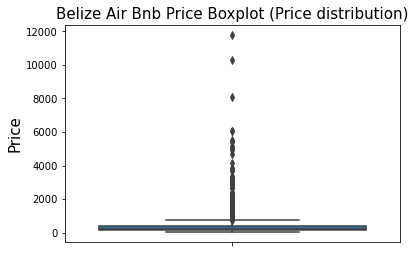

In [19]:
##Boxplot

sns.boxplot(y='price', data=belize_df)

#Labeling and adjusting the boxplot
plt.ylabel("Price", size=15)
plt.title("Belize Air Bnb Price Boxplot (Price distribution)", size=15)


Text(0.5, 1.0, 'Belize Air Bnb Price Boxplot (Price distribution)')

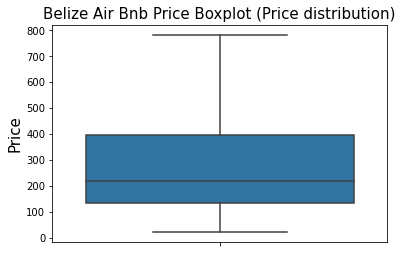

In [20]:
# Boxplot with no outliers
sns.boxplot(y='price', data=belize_df, showfliers = False)

plt.ylabel("Price", size=15)
plt.title("Belize Air Bnb Price Boxplot (Price distribution)", size=15)

### There are some very high priced outliers in this dataset. As a result, the boxplot is compressed and it difficult to see the quartile and median values. In the second plot, I opted to not show these outliers so we can see the rest of the plot more clearly. The range of price values is quite large, but the vast majority of prices are much lower than than the higher priced outliers. 
